<a href="https://colab.research.google.com/github/sappyb/EDM/blob/main/Final_Copy_of_EDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis
!pip install emoji
!pip install contractions
!pip install textblob
!pip install gensim
!pip install vaderSentiment
!pip install nltk
!pip uninstall sklearn
!pip install scikit-learn
!pip install asyncpraw
!pip install clean-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=4f0bbb477dd3b954e18de2823bcc9342506550681d63be3eb46dbb75eba1f652
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji
  Attempting uninstall: emoji
    Found e

In [ ]:
def print_top_salient_words(model, dictionary, top_n=30):
    """
    Print the top N salient words for each topic in the model.

    Args:
        model: Trained LDA model.
        dictionary: Gensim dictionary used in the model.
        top_n: Number of top words to display per topic.
    """
    print("Top salient words for each topic:\n")
    for topic_id in range(model.num_topics):
        topic_terms = model.get_topic_terms(topic_id, topn=top_n)
        words = [(dictionary[word_id], round(weight, 4)) for word_id, weight in topic_terms]
        print(f"Topic {topic_id}:")
        for word, weight in words:
            print(f"  {word}: {weight}")
        print("\n")

In [ ]:
import ast
import re
import emoji
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from collections import defaultdict

from gensim import corpora
from gensim.models import Phrases, LdaModel, CoherenceModel
from gensim.models.phrases import Phraser
from gensim.utils import simple_preprocess

from transformers import pipeline

import pyLDAvis
from cleantext import clean
import contractions

# Display pyLDAvis version
print("pyLDAvis version:", pyLDAvis.__version__)



pyLDAvis version: 3.4.0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Length before removing 2025: 827
Length after removing 2025: 790
Length after removing 2025: 10


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cpu


///////////////
(7, 7)
///////////////
Num Topics: 7, Coherence Score: 0.3052853374211952
Best Coherence Score: 0.3052853374211952 with 7 topics.
(0, '0.733*"often" + 0.248*"even" + 0.002*"something" + 0.002*"give" + 0.002*"right" + 0.002*"thing" + 0.002*"still" + 0.002*"need" + 0.002*"free" + 0.002*"good"')
(1, '0.077*"use" + 0.077*"anyone" + 0.077*"often" + 0.077*"even" + 0.077*"still" + 0.077*"something" + 0.077*"good" + 0.077*"need" + 0.077*"university" + 0.077*"give"')
(2, '0.643*"still" + 0.321*"good" + 0.003*"use" + 0.003*"anyone" + 0.003*"often" + 0.003*"even" + 0.003*"need" + 0.003*"something" + 0.003*"thing" + 0.003*"give"')
(3, '0.945*"university" + 0.008*"use" + 0.006*"give" + 0.004*"need" + 0.004*"free" + 0.004*"still" + 0.004*"right" + 0.004*"good" + 0.004*"even" + 0.004*"something"')
(4, '0.955*"anyone" + 0.004*"use" + 0.004*"often" + 0.004*"even" + 0.004*"good" + 0.004*"still" + 0.004*"something" + 0.004*"need" + 0.004*"university" + 0.004*"thing"')
(5, '0.164*"need" + 

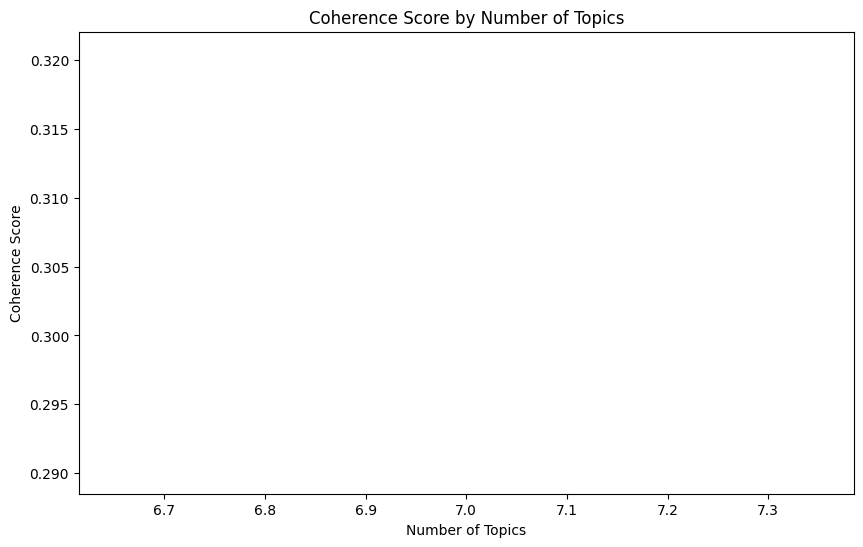

Processed data saved to processed_reddit_posts.csv


<Figure size 640x480 with 0 Axes>

In [ ]:
# Ensure nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
cs = {}
#Step 0: Clean Text
def clean_text(text):
    """
    Cleans the input text using the clean-text package.

    Args:
        text (str): Input text to be cleaned.

    Returns:
        str: Cleaned text.
    """
    if not isinstance(text, str):
        return None

    # Use clean-text to clean the text
    cleaned = clean(
        text,
        lower=True,                # Convert text to lowercase
        no_urls=True,              # Remove URLs
        no_emails=True,            # Remove email addresses
        no_phone_numbers=True,     # Remove phone numbers
        no_numbers=False,          # Keep numbers
        no_punct=False,            # Keep punctuation
        no_emoji=True,             # Remove emojis
        replace_with_url="",       # Replace URLs with an empty string
        replace_with_email="",     # Replace emails with an empty string
        replace_with_phone_number="" # Replace phone numbers with an empty string
    )
    return cleaned


def split_text_into_chunks(text, max_length=512):
    """
    Splits the text into smaller chunks of specified max length.

    Args:
        text (str): Input text to be split.
        max_length (int): Maximum length of each chunk.

    Returns:
        list: A list of text chunks.
    """
    words = text.split()
    chunks = []
    current_chunk = []

    for word in words:
        if len(' '.join(current_chunk + [word])) > max_length:
            chunks.append(' '.join(current_chunk))
            current_chunk = [word]
        else:
            current_chunk.append(word)

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

def analyze_emotions_post(df, text_column):
    """
    Cleans and analyzes emotions for each text in the specified dataframe column.
    Returns the major emotion for the entire post.

    Args:
        df (pd.DataFrame): Input dataframe containing text data.
        text_column (str): Column name in the dataframe containing the text.

    Returns:
        pd.DataFrame: DataFrame with an additional 'cleaned_text' and 'major_emotion' column.
    """
    # Initialize the emotion classification pipeline
    pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")

    def extract_major_emotion(text):
        """
        Extract the major emotion for a given text by aggregating scores from chunks.

        Args:
            text (str): Input text to analyze.

        Returns:
            str: The label of the major emotion.
        """
        if not isinstance(text, str):
            return None

        try:
            chunks = split_text_into_chunks(text)
            emotion_scores = defaultdict(float)  # To store cumulative scores for each emotion

            for chunk in chunks:
                results = pipe(chunk, max_length=512)  # Analyze each chunk
                for result in results:
                    emotion_scores[result['label']] += result['score']  # Aggregate scores

            # Determine the emotion with the highest cumulative score
            if emotion_scores:
                major_emotion = max(emotion_scores, key=emotion_scores.get)
                return major_emotion
            else:
                return None
        except Exception as e:
            print(f"Error analyzing text: {text}. Error: {e}")
            return None
    # Step 1: Clean the text
    df['cleaned_text'] = df[text_column].apply(clean_text)

    # Step 2: Determine the major emotion for each post
    df['major_emotion_post'] = df['cleaned_text'].apply(extract_major_emotion)
    return df





# Step 1: Data Preprocessing
def preprocess_data(df, text_column):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'get', 'also', 'know', 'make', 'thing', 'utm_medium', 'utm_source'}

    # Add words with underscores that do NOT contain 'adhd' to custom stopwords
    underscore_stopwords = {word for word in df[text_column].str.cat(sep=' ').split() if '_' in word and 'adhd' not in word.lower()}
    custom_stopwords.update(underscore_stopwords)
    cs = custom_stopwords
    # Update the stop words set
    stop_words.update(custom_stopwords)

    def clean_text(text):
        # Replace emojis
        text = emoji.replace_emoji(text, replace='')
        # Expand contractions
        text = contractions.fix(text)
        # Tokenize and remove punctuation
        tokens = simple_preprocess(text, deacc=True)
        # Lemmatize and filter tokens
        filtered_tokens = [
            lemmatizer.lemmatize(word)
            for word in tokens
            if word not in stop_words and len(word) > 2
        ]
        return filtered_tokens

    # Apply cleaning
    df[text_column] = df[text_column].fillna('').apply(clean_text)

    # Drop empty rows
    df = df[df[text_column].str.strip() != '']
    return df

# Step 2: Add N-grams
def add_ngrams(texts):
    bigram = Phrases(texts, min_count=5, threshold=10)
    trigram = Phrases(bigram[texts], threshold=10)
    # Use Phraser directly instead of Phrases.Phraser
    bigram_mod = Phraser(bigram)
    trigram_mod = Phraser(trigram)
    return [trigram_mod[bigram_mod[text]] for text in texts]

# Step 3: Sentiment Analysis
def analyze_sentiments(df, text_column):
    analyzer = SentimentIntensityAnalyzer()

    def get_vader_scores(sentences):
        return [analyzer.polarity_scores(sentence)['compound'] for sentence in sentences]

    def get_textblob_scores(sentences):
        return [TextBlob(sentence).sentiment.polarity for sentence in sentences]


    # Apply the functions to the dataframe
    df['vader_sentiments'] = df[text_column].apply(get_vader_scores)
    df['textblob_sentiments'] = df[text_column].apply(get_textblob_scores)

    # Calculate statistics for sentiment scores and store in new columns
    df['vader_median'] = df['vader_sentiments'].apply(lambda x: np.median(x) if x else None)
    df['textblob_median'] = df['textblob_sentiments'].apply(lambda x: np.median(x) if x else None)
    df['vader_25_percentile'] = df['vader_sentiments'].apply(lambda x: np.percentile(x, 25) if x else None)
    df['textblob_25_percentile'] = df['textblob_sentiments'].apply(lambda x: np.percentile(x, 25) if x else None)
    df['vader_75_percentile'] = df['vader_sentiments'].apply(lambda x: np.percentile(x, 75) if x else None)
    df['textblob_75_percentile'] = df['textblob_sentiments'].apply(lambda x: np.percentile(x, 75) if x else None)
    df['vader_std'] = df['vader_sentiments'].apply(lambda x: np.std(x) if x else None)
    df['textblob_std'] = df['textblob_sentiments'].apply(lambda x: np.std(x) if x else None)

    return df

# Step 4: Emotion Analysis
def analyze_emotions(df, text_column):
    """
    Analyzes emotions for each text in the specified DataFrame column,
    handling long texts by splitting them into chunks.

    Args:
        df (pd.DataFrame): Input DataFrame containing text data.
        text_column (str): Column name in the DataFrame containing the text.

    Returns:
        pd.DataFrame: DataFrame with an additional 'emotions' column containing emotion tuples.
    """
    # Initialize the emotion classification pipeline
    pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")

    def split_text_into_chunks(text, max_length=512):
        """
        Splits text into chunks to avoid truncation.

        Args:
            text (str): The input text.
            max_length (int): Maximum token length per chunk.

        Returns:
            list: List of text chunks.
        """
        if not isinstance(text, str) or text.strip() == "":
            return []
        return textwrap.wrap(text, width=max_length)

    def get_emotion_tuples(text_list):
        """
        Extracts emotions for each chunk of text and aggregates results.

        Args:
            text_list (list): List of input texts to analyze.

        Returns:
            list: List of lists containing tuples of (emotion label, score) for each input text.
        """
        if not isinstance(text_list, list) or not all(isinstance(text, str) for text in text_list):
            return None  # Handle non-list or non-string inputs gracefully

        all_emotions = []  # Store emotions for all texts

        for text in text_list:
            if text.strip() == "":
                all_emotions.append([])  # Append an empty list for empty strings
                continue

            chunks = split_text_into_chunks(text)  # Split long text into chunks
            text_emotions = []  # Store emotions for this specific text

            for chunk in chunks:
                emotions = pipe(chunk, truncation=True, max_length=512)
                sub_emotions = [(emotion['label'], emotion['score']) for emotion in emotions]
                text_emotions.append(sub_emotions)

            all_emotions.append(text_emotions)

        return all_emotions

    # Apply the function to analyze emotions for each post
    df['emotions'] = df[text_column].apply(get_emotion_tuples)

    return df



# Step 4: Topic Modelling
def perform_topic_modeling(df, text_column, num_topics_range=(1, 100)):
    texts = df[text_column].tolist()
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_above=0.5)  # Remove overly common words
    corpus = [dictionary.doc2bow(text) for text in texts]
    word = dictionary[[0][:1][0]]

    coherence_scores = []
    best_model, best_coherence, best_num_topics = None, 0, 0
    print("///////////////")
    print(num_topics_range)
    print("///////////////")


    for num_topics in range(num_topics_range[0], num_topics_range[1] + 1):
        lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            #passes=20,            # Increased passes
            #iterations=100,       # Increased iterations
            alpha='auto',         # Learn alpha
            eta=0.01,           # Learn eta
            passes=30,         # Slightly increased passes
            iterations=300,    # Increased iterations for stabilit
        )
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((num_topics, coherence_score))

        print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score}")

        if coherence_score > best_coherence:
            best_model, best_coherence, best_num_topics = lda_model, coherence_score, num_topics

    print(f"Best Coherence Score: {best_coherence} with {best_num_topics} topics.")
    topics = best_model.print_topics(num_words=10)
    for topic in topics:
        print(topic)

    # Print topics with top 15 words
    topics = best_model.print_topics(num_words=15)
    print("Topics and their top words:\n")
    for topic_id, topic_words in topics:
        print(f"Topic {topic_id}: {topic_words}\n")

    # Print topics with top 30 salient words
    print_top_salient_words(best_model, dictionary, top_n=30)
    print(f"coherence scores- {coherence_scores} ")
    # Plot coherence scores
    plt.figure(figsize=(10, 6))
    plt.plot(*zip(*coherence_scores))
    plt.title('Coherence Score by Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.show()
    plt.savefig('Coherence_Number_Topics.pdf')
    return best_model, corpus, dictionary

#Step 4.2: Get the dominant topic for each row
def assign_dominant_topic_from_word_lists(df, lda_model, dictionary, text_column):
    """
    Assign the dominant topic to each row in the DataFrame using a list of words from the specified column.

    Args:
        df (pd.DataFrame): DataFrame containing the text data as lists of words.
        lda_model: Trained LDA model.
        dictionary: Dictionary created during topic modeling.
        text_column (str): Column name containing the list of words.

    Returns:
        pd.DataFrame: DataFrame with an additional 'dominant_topic' column containing (topic_id, probability).
    """
    def get_dominant_topic(word_list):
        """
        Get the dominant topic for a given list of words.

        Args:
            word_list (list): List of words representing the text.

        Returns:
            tuple: Dominant topic ID and its corresponding probability.
        """
        if not isinstance(word_list, list):
            return None  # Handle cases where the column doesn't contain a list

        # Convert the list of words to bag-of-words format
        bow = dictionary.doc2bow(word_list)

        # Get topic distribution for the document
        topic_probs = lda_model.get_document_topics(bow)

        if topic_probs:
            # Find the topic with the highest probability
            dominant_topic = max(topic_probs, key=lambda x: x[1])
            return dominant_topic  # (topic_id, probability)
        else:
            return None

    # Apply the dominant topic extraction function to the DataFrame
    df['dominant_topic'] = df[text_column].apply(get_dominant_topic)

    return df



# Step 5: Longitudinal Analysis
def longitudinal_analysis(df, year_column, sentiment_column, title_text):
    yearly_sentiment = df.groupby(year_column)[sentiment_column].mean()
    plt.figure(figsize=(10, 6))
    yearly_sentiment.plot(kind='bar', color='skyblue')
    plt.title('Yearly Sentiment Trends')
    plt.xlabel('Year')
    plt.ylabel(title_text)
    plt.show()
    plt.savefig('Yearly_Sentiment_Trends.pdf')




# Assuming 'df' is your DataFrame and 'all_comments_list' is the column
def convert_to_list(data):
    if isinstance(data, str):  # Check if the data is a string
        try:
            # Attempt to parse it as a Python-style list
            return ast.literal_eval(data)
        except (ValueError, SyntaxError):
            # If parsing fails, raise an error or handle accordingly
            raise ValueError(f"Cannot convert to list: {data}")
    return data  # If it's already a list, return as-is







# Load dataset (Replace with actual dataset path)
file_path = 'reddit_posts_with_year_comments_and_text.csv'  # Placeholder
df = pd.read_csv(file_path)

print(f"Length before removing 2025: {len(df)}")
df = df[df['year'] != 2025]
print(f"Length after removing 2025: {len(df)}")

df.drop(df.index[10:], inplace=True)
print(f"Length after removing 2025: {len(df)}")

# Preprocess data
df = preprocess_data(df, text_column='text')
#df['text'] = add_ngrams(df['text'])

# Apply the conversion to the entire column
df['all_comments_list'] = df['all_comments_list'].apply(convert_to_list)

# Analyze sentiments
df = analyze_sentiments(df, text_column='all_comments_list')

# Analyze emotions
df = analyze_emotions(df, text_column='all_comments_list')

# Perform topic modeling
lda_model, corpus, dictionary = perform_topic_modeling(df, text_column='text', num_topics_range=(7, 7))


# Assign dominant topics to each row
df = assign_dominant_topic_from_word_lists(df, lda_model, dictionary, text_column='text')

# Split the dominant_topic column into separate topic_id and topic_prob columns
df['topic_id'] = df['dominant_topic'].apply(lambda x: x[0] if x else None)
df['topic_prob'] = df['dominant_topic'].apply(lambda x: x[1] if x else None)

# Longitudinal analysis
#longitudinal_analysis(df, year_column='year', sentiment_column='vader_median', title_text="Average of Median Sentiment Score")
#longitudinal_analysis(df, year_column='year', sentiment_column='vader_std', title_text="Average of Standard Deviation of Sentiment Score")

df.to_csv('processed_reddit_posts.csv', index=False)
print("Processed data saved to processed_reddit_posts.csv")


Number of Vader Sentiment Scores: 1817168


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


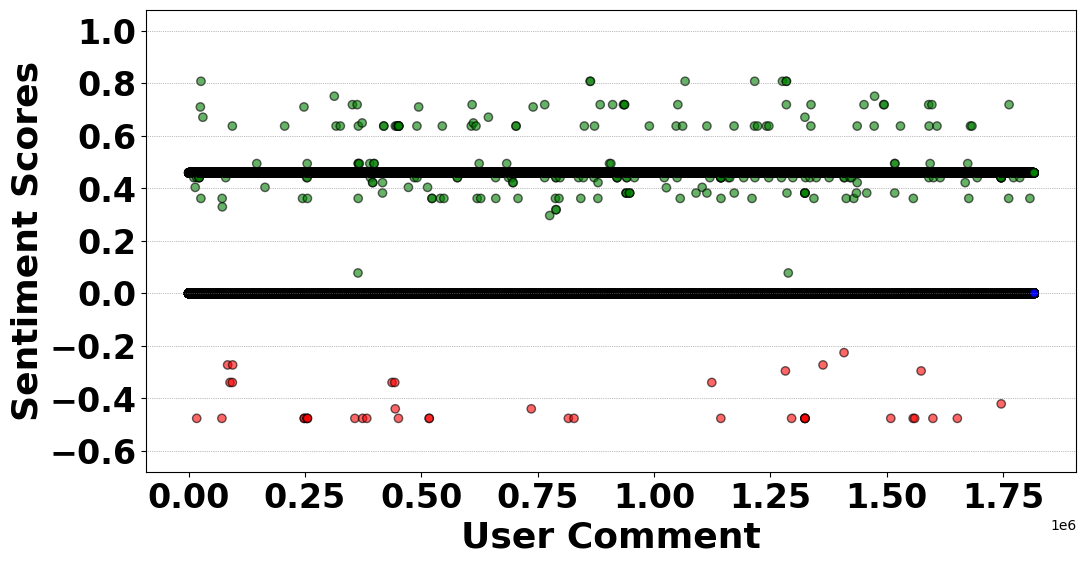

In [ ]:
vader_columns = ['vader_sentiments']  # Identify all Vader sentiment columns
# Flatten all sentiment values into one list, ignoring NaNs
# Flatten the lists into one single list
vader_values = [item for sublist in df['vader_sentiments'] for item in sublist]

print(f"Number of Vader Sentiment Scores: {len(vader_values)}")

# Plot for Vader Sentiment Scores
x_values = range(len(vader_values))
colors = ['green' if val > 0.05 else 'red' if val < -0.05 else 'blue' for val in vader_values]

plt.figure(figsize=(12, 6))
plt.scatter(x_values, vader_values, c=colors, alpha=0.6, edgecolors='black')

for y in plt.yticks()[0]:
    plt.axhline(y=y, color='gray', linestyle=':', linewidth=0.5)

plt.xlabel("User Comment", fontsize=26, fontweight='bold')
plt.ylabel("Sentiment Scores", fontsize=26, fontweight='bold')
#plt.title("Scatter Plot Of Vader Sentiment Scores", fontsize=18, fontweight='bold')

plt.xticks(fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')

plt.savefig('scatter_plot_of_vader_sentiment_scores_comment.pdf')
plt.show()

In [ ]:
# Function to compute sentiment score
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    if isinstance(text, str):  # Check if text is valid
        return analyzer.polarity_scores(text)['compound']
    return None  # Return None for missing values

# Apply the function to the 'text_title' column efficiently using .apply()
df['vader_text_title'] = df['text_title'].apply(get_vader_sentiment)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


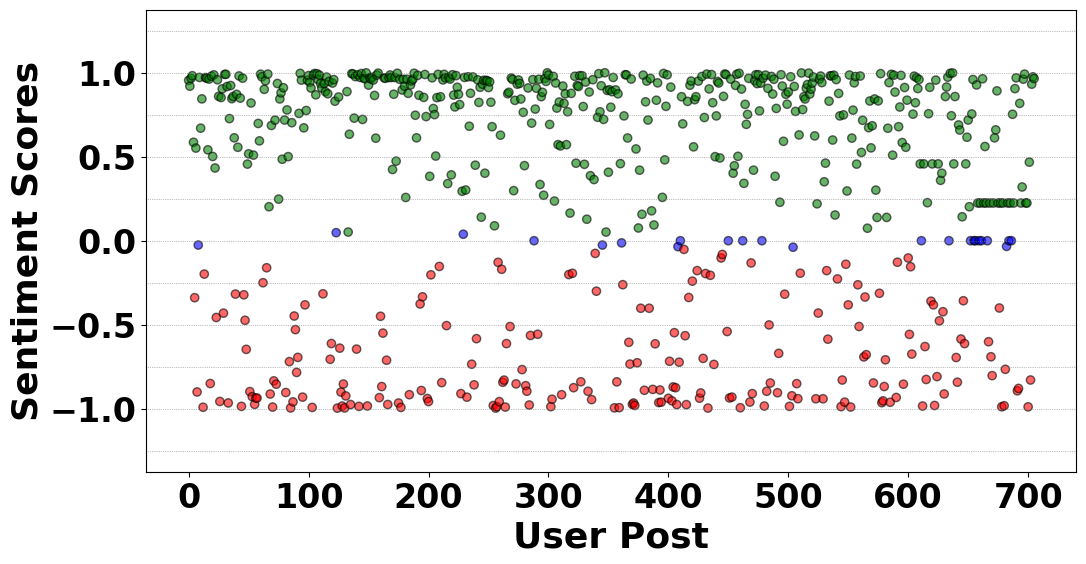

In [ ]:
# Remove NaN values from the sentiment column

sentiment_values = df['vader_text_title'].dropna().tolist()
# Generate x values for the scatter plot
x_values = range(len(sentiment_values))

# Define colors based on sentiment polarity
colors = ['green' if val > 0.05 else 'red' if val < -0.05 else 'blue' for val in sentiment_values]

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x_values, sentiment_values, c=colors, alpha=0.6, edgecolors='black')

# Add horizontal dotted lines at each tick
for y in plt.yticks()[0]:
    plt.axhline(y=y, color='gray', linestyle=':', linewidth=0.5)

# Labels and title with increased font size, bold font, and capitalized words
plt.xlabel("User Post", fontsize=26, fontweight='bold')
plt.ylabel("Sentiment Scores", fontsize=26, fontweight='bold')
#plt.title("Scatter Plot Of Sentiment Scores For Text Title", fontsize=18, fontweight='bold')

# Increase tick font size and make them bold
plt.xticks(fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')

# Save the plot before showing it
plt.savefig('scatter_plot_of_sentiment_scores_for_post.pdf')

# Show the plot
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                vader_sentiments  \
0                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

<ipython-input-21-3fea9c7ec71e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='topic_id', y=df['combined_vader'].apply(np.median), palette=palette)


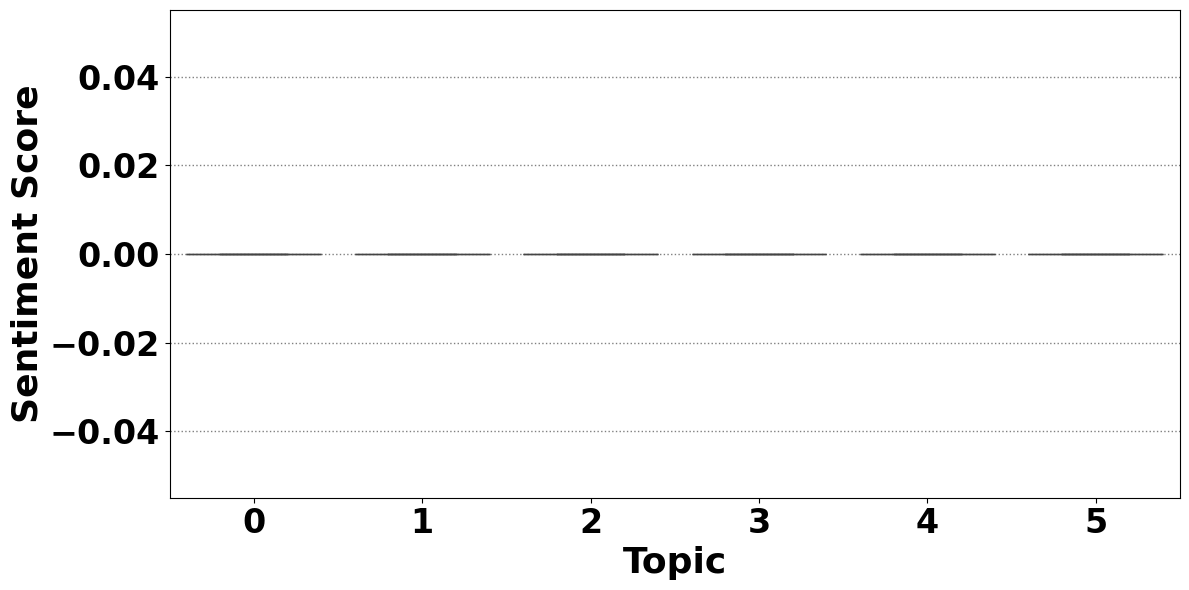

In [ ]:

# Append the number from 'additional_values' to 'vader_sentiments' if it's not NaN
df['combined_vader'] = df.apply(
    lambda row: row['vader_sentiments'] + [row['vader_text_title']] if pd.notna(row['vader_text_title']) else row['vader_sentiments'],
    axis=1
)

# Display the updated DataFrame
print(df[['vader_sentiments', 'vader_text_title', 'combined_vader']])
# Append the number from 'vader_text_title' to the list in 'vader_sentiments'
df['combined_vader'] = df.apply(lambda row: row['vader_sentiments'] + [row['vader_text_title']], axis=1)
# Visualization 2: Box Plot for Distribution
plt.figure(figsize=(12, 6))
unique_topics = df['topic_id'].unique()
palette = sns.color_palette('husl', len(unique_topics))
sns.boxplot(data=df, x='topic_id', y=df['combined_vader'].apply(np.median), palette=palette)
#plt.title('Distribution of Sentiment Scores by Topic', fontsize=18, fontweight='bold')
plt.xlabel('Topic', fontsize=26, fontweight='bold')
plt.ylabel('Sentiment Score', fontsize=26, fontweight='bold')
plt.grid(axis='y', linestyle=':', linewidth=1, color='gray')

# Increase tick font size and make them bold
plt.xticks(fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')
plt.tight_layout()
plt.savefig('sent_topic.pdf')

plt.show()


In [ ]:
# Load the emotion classification model
emotion_pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")

def clean_text(text):
    """Basic text cleaning: remove extra spaces and convert to lowercase."""
    if isinstance(text, str):
        return text.strip().lower()
    return ""

def split_text_into_chunks(text, max_length=512):
    """
    Splits text into chunks of max_length tokens.

    Args:
        text (str): The input text.
        max_length (int): The max token length per chunk.

    Returns:
        list: List of text chunks.
    """
    return textwrap.wrap(text, width=max_length)

def extract_major_emotion(text):
    """
    Extracts the dominant emotion by analyzing text chunks.

    Args:
        text (str): The input text.

    Returns:
        str: The most prominent emotion label.
    """
    if not isinstance(text, str) or text.strip() == "":
        return None

    try:
        chunks = split_text_into_chunks(text)
        emotion_scores = defaultdict(float)  # Stores cumulative scores for each
        for chunk in chunks:
            results = emotion_pipe(chunk, max_length=512, truncation=True)
            for result in results:
                emotion_scores[result['label']] += result['score']

        # Identify the dominant emotion
        print(emotion_scores)
        if emotion_scores:
            major_emotion = max(emotion_scores, key=emotion_scores.get)
            return [[(f'{major_emotion}', emotion_scores[major_emotion])]]
        else:
            return None

    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")
        return None

# Process the 'text_title' column and save results in the same DataFrame
df["cleaned_text_title"] = df["text_title"].apply(clean_text)
df["post_emotion_analysis"] = df["cleaned_text_title"].apply(extract_major_emotion)


print("Emotion analysis completed! Updated DataFrame saved with new column 'major_emotion_text_title'.")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Device set to use cpu


defaultdict(<class 'float'>, {'joy': 0.7160824537277222, 'neutral': 10.31647875905037, 'disappointment': 0.37225860357284546})
defaultdict(<class 'float'>, {'disappointment': 0.4431934654712677, 'love': 0.5540295243263245})
defaultdict(<class 'float'>, {'disappointment': 0.7069187164306641, 'confusion': 1.4644017815589905, 'approval': 0.36853960156440735, 'desire': 0.44527801871299744})
defaultdict(<class 'float'>, {'love': 0.8275852203369141, 'curiosity': 0.22616435587406158, 'gratitude': 0.986329972743988})
defaultdict(<class 'float'>, {'curiosity': 0.6549606323242188})
defaultdict(<class 'float'>, {'sadness': 0.2515644431114197, 'optimism': 0.37761154770851135})
defaultdict(<class 'float'>, {'neutral': 0.5443874597549438})
defaultdict(<class 'float'>, {'curiosity': 0.7235453128814697, 'annoyance': 0.6515657305717468})
defaultdict(<class 'float'>, {'annoyance': 0.6269948482513428, 'joy': 0.7513181567192078})
Emotion analysis completed! Updated DataFrame saved with new column 'major_e

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('gratitude', 0.7362597584724426), ('approval', 0.5901790857315063), ('gratitude', 0.9359501004219055)]
[('gratitude', 0.9257466793060303), ('gratitude', 0.9671812653541565), ('neutral', 0.6468194127082825), ('neutral', 0.7002931237220764), ('neutral', 0.7635824680328369), ('neutral', 0.6936253309249878), ('curiosity', 0.4739384949207306), ('neutral', 0.8735958337783813), ('neutral', 0.9157745838165283), ('neutral', 0.8590282797813416), ('remorse', 0.8189926147460938), ('admiration', 0.4059234857559204), ('excitement', 0.32122740149497986), ('neutral', 0.9672672748565674), ('admiration', 0.759838342666626), ('neutral', 0.5738739967346191), ('annoyance', 0.5242290496826172), ('admiration', 0.5271384119987488), ('caring', 0.39538589119911194), ('approval', 0.45217686891555786), ('gratitude', 0.9718354940414429), ('gratitude', 0.896842360496521), ('curiosity', 0.6162688136100769), ('gratitude', 0.9891670942306519), ('neutral', 0.25914719700813293), ('joy', 0.7598298788070679), ('neutral'

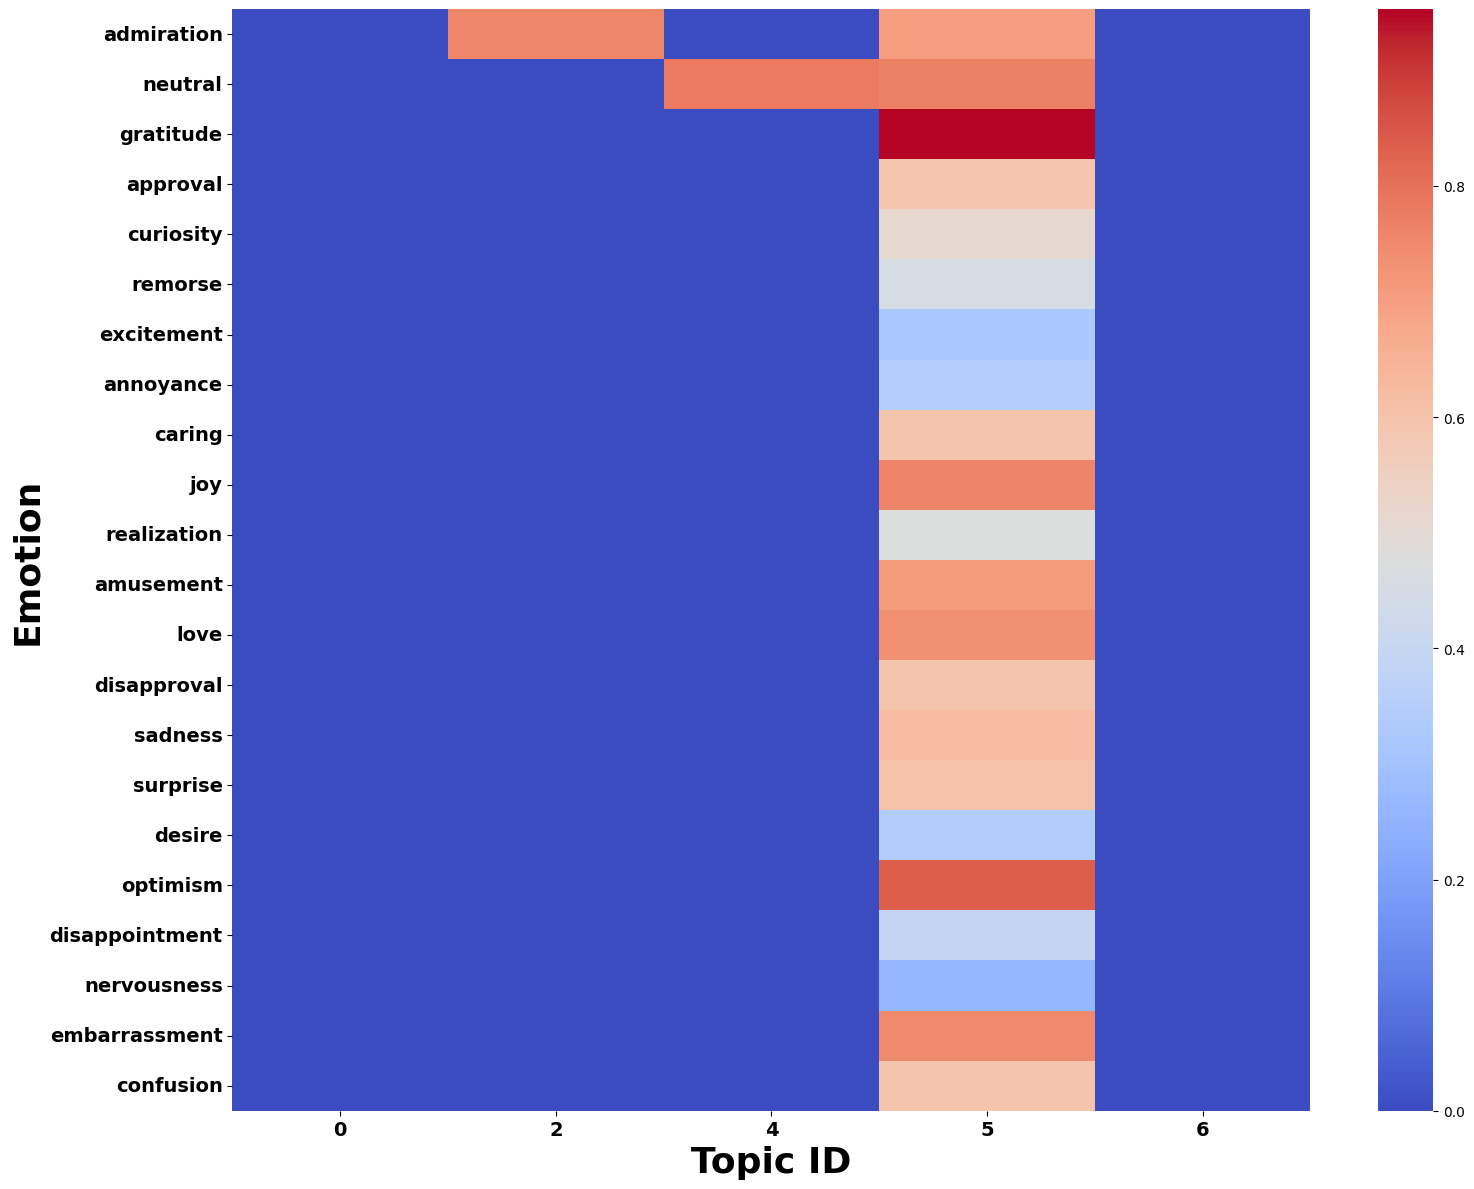

In [ ]:
data = df.copy()

def parse_and_flatten_emotions(emotions_data):
    """
    Parse the string representation of nested lists and flatten it.
    """
    try:
        # Parse the string if it's in string format
        if isinstance(emotions_data, str):
            emotions_data = ast.literal_eval(emotions_data)

        # Recursive function to flatten nested lists
        def flatten(data):
            flattened = []
            for item in data:
                if isinstance(item, list):
                    flattened.extend(flatten(item))  # Recursively flatten
                elif isinstance(item, tuple) and len(item) == 2:
                    flattened.append(item)
            return flattened
        print(flatten(emotions_data))
        return flatten(emotions_data)
    except Exception as e:
        print(f"Error parsing and processing emotions data: {emotions_data}\n{e}")
        return []

# Apply the updated parsing function to the `emotions` column
data['cleaned_emotions'] = data['emotions'].apply(parse_and_flatten_emotions)




# Debugging and ensuring all steps are executed correctly

# Regroup by topic_id and clean emotions properly
topic_emotions_cleaned = data.groupby('topic_id')['cleaned_emotions'].apply(lambda x: [item for sublist in x for item in sublist])
print(topic_emotions_cleaned)
# Check if topic_emotions_cleaned has valid data
if not topic_emotions_cleaned.empty:
    # Recalculate the average emotion scores for all topics
    all_topics_average_emotions_cleaned = {}
    for topic_id, emotion_list in topic_emotions_cleaned.items():
        emotion_scores = defaultdict(list)
        for emotion, score in emotion_list:
            emotion_scores[emotion].append(score)
        # Calculate the average for each emotion in the current topic
        average_emotion_scores = {emotion: sum(scores) / len(scores) for emotion, scores in emotion_scores.items()}
        all_topics_average_emotions_cleaned[topic_id] = average_emotion_scores

    # Convert the result into a DataFrame for display
    all_topics_average_emotions_cleaned_df = pd.DataFrame(all_topics_average_emotions_cleaned).fillna(0)
else:
    all_topics_average_emotions_cleaned_df = pd.DataFrame()

# Verify the output DataFrame
#import ace_tools as tools; tools.display_dataframe_to_user(name="Debugged Average Emotion Scores by Topic", dataframe=all_topics_average_emotions_cleaned_df)

# Plot the heatmap if the DataFrame is not empty
if not all_topics_average_emotions_cleaned_df.empty:
    plt.figure(figsize=(16, 12))
    sns.heatmap(all_topics_average_emotions_cleaned_df, cmap="coolwarm", annot=False, cbar=True)

    #plt.title("Average Emotion Scores By Topic", fontsize=18, fontweight='bold')
    plt.xlabel("Topic ID", fontsize=26, fontweight='bold')
    plt.ylabel("Emotion", fontsize=26, fontweight='bold')

    plt.xticks( fontsize=14, fontweight='bold')
    plt.yticks( fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig('average_emotion_scores_by_topic.pdf')
    plt.show()
else:
    print("The cleaned DataFrame is empty. Please check the input data or processing logic.")


In [ ]:
def plot_emotions_with_scores(df, emotions_column='emotions', name="Post"):
    """
    Plot both the aggregated emotion counts and average scores for the dataset.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        emotions_column (str): The column containing emotion tuples.

    Returns:
        None: Displays the plots.
    """
    # Initialize dictionaries for emotion counts and scores
    emotion_counts = defaultdict(int)
    emotion_scores = defaultdict(float)

    # Process each row in the DataFrame
    for emotions_list in df[emotions_column]:
        if isinstance(emotions_list, list) and emotions_list:  # Check if it's a valid non-empty list
            for emotion in emotions_list:
                # Check if the emotion element is a tuple with at least 2 values
                if isinstance(emotion, list):
                    for emotion_tuple in emotion:
                        if isinstance(emotion_tuple, tuple) and len(emotion_tuple) >= 2:
                            label, score = emotion_tuple[:2]  # Unpack the first two elements as label, score
                            emotion_counts[label] += 1
                            emotion_scores[label] += score

    # Calculate average scores
    for emotion in emotion_scores:
        emotion_scores[emotion] /= emotion_counts[emotion]


    # Convert to DataFrames for easier plotting
    emotion_data = pd.DataFrame({
        'Emotion': [key.capitalize() for key in emotion_counts.keys()],
        'Count': list(emotion_counts.values()),
        'Average Score': [emotion_scores[emotion] for emotion in emotion_counts]
    }).sort_values(by='Count', ascending=False)

    # Plot emotion counts
    plt.figure(figsize=(14, 6))
    plt.bar(emotion_data['Emotion'], emotion_data['Count'], color='skyblue', label='Count')
    plt.title('Emotion Count Distribution', fontsize=18, fontweight='bold')
    plt.yscale('log')
    # Draw horizontal dotted lines at y-ticks

    plt.grid(axis='y', linestyle=':', linewidth=1, color='gray')
    plt.xlabel('Emotion', fontsize=16, fontweight='bold')
    plt.ylabel('Count', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'Emotion Count Distribution {name}.pdf')



    # Convert to DataFrames for easier plotting
    emotion_data = pd.DataFrame({
        'Emotion': [key.capitalize() for key in emotion_counts.keys()],
        'Count': list(emotion_counts.values()),
        'Average Score': [emotion_scores[emotion] for emotion in emotion_counts]
    }).sort_values(by='Average Score', ascending=False)
    # Plot average scores
    plt.figure(figsize=(14, 6))
    plt.bar(emotion_data['Emotion'], emotion_data['Average Score'], color='orange', label='Average Score')

    plt.title('Average Emotion Scores', fontsize=16, fontweight='bold')
    plt.xlabel('Emotion', fontsize=14, fontweight='bold')
    plt.ylabel('Average Score', fontsize=14, fontweight='bold')
    plt.yscale('log')
    # Draw horizontal dotted lines at y-ticks

    plt.grid(axis='y', linestyle=':', linewidth=1, color='gray')


    plt.xticks(rotation=45, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig(f'average_emotion_scores_{name}.pdf')
    plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


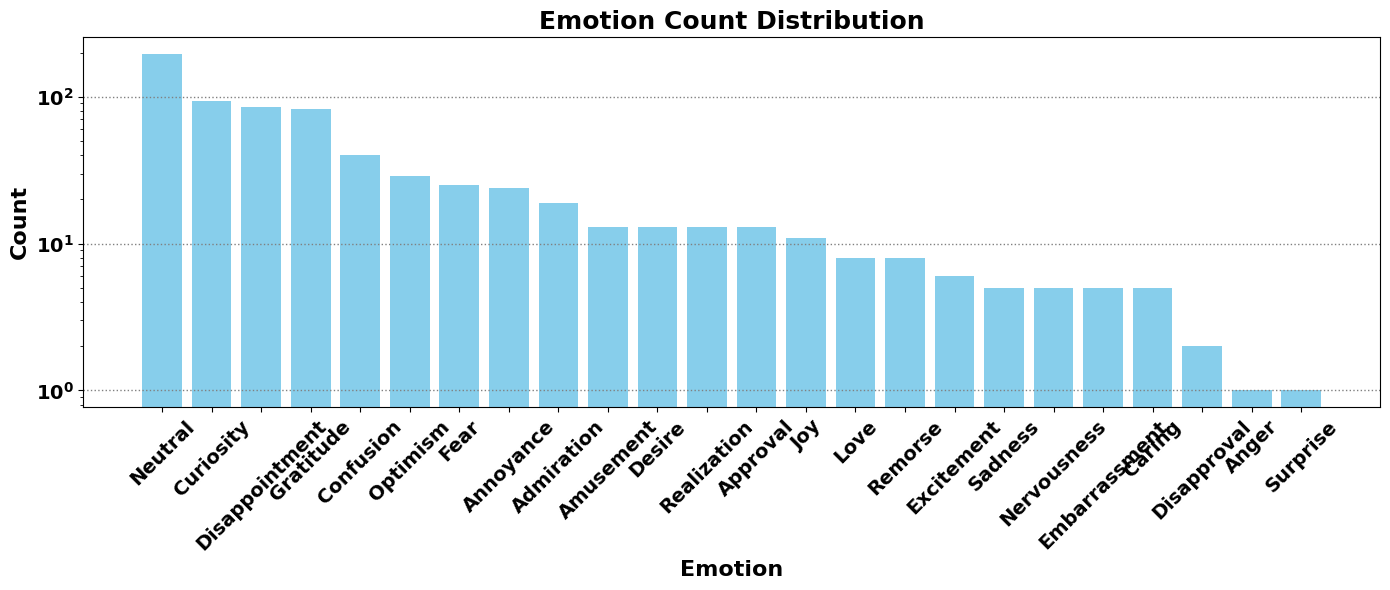

<Figure size 640x480 with 0 Axes>

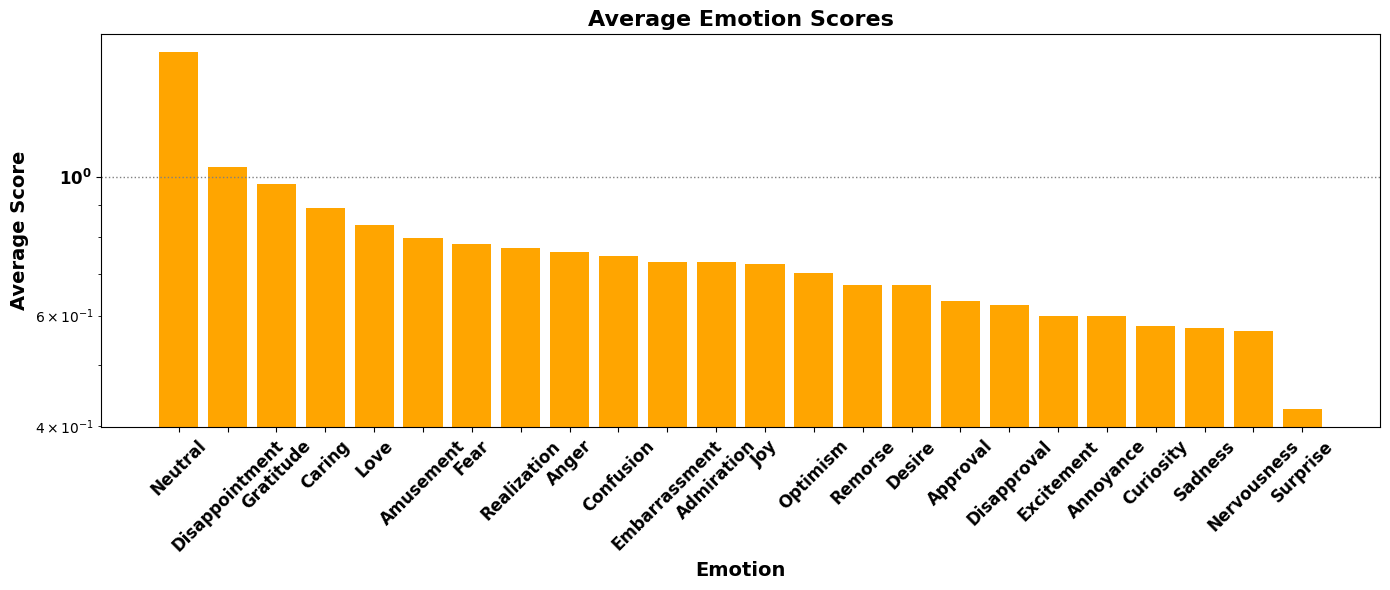

In [ ]:
plot_emotions_with_scores(df, emotions_column='post_emotion_analysis')
#plot_emotions_with_scores(df)

In [ ]:
pyLDAvis.enable_notebook()
import pyLDAvis.gensim
from gensim import matutils

# Filter out unwanted words
dictionary.filter_tokens(bad_ids=[dictionary.token2id[word] for word in cs if word in dictionary.token2id])



vocab = list(dictionary.token2id.keys())  # Get the vocabulary
term_frequency = [dictionary.dfs[dictionary.token2id[token]] for token in vocab] # Get term frequencies
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, vocab=vocab, term_frequency=term_frequency)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.029281  0.012683       1        1  45.319217
0      0.079271  0.005673       2        1  22.971774
4     -0.042033 -0.048882       3        1   8.001979
2      0.075127  0.108804       4        1   7.258691
1      0.001994  0.124816       5        1   7.041761
5     -0.287929 -0.041658       6        1   6.661868
6      0.144289 -0.161435       7        1   2.744709, topic_info=               Term        Freq        Total Category  logprob  loglift
248           study  855.000000   855.000000  Default  30.0000  30.0000
801            note  630.000000   630.000000  Default  29.0000  29.0000
296   accommodation  772.000000   772.000000  Default  28.0000  28.0000
111            http  533.000000   533.000000  Default  27.0000  27.0000
1335        lecture  354.000000   354.000000  Default  26.0000  26.0000
...             ...         ...          ...      ...      ...      ...
87             feel   26.458941  1011.925833   Topic7  -5.2362  -0.0485
255            take   25.975882   998.013854   Topic7  -5.2547  -0.0531
540            even   25.472209   990.920607   Topic7  -5.2743  -0.0656
447           could   24.327317   821.567016   Topic7  -5.3202   0.0759
183          people   22.440252   851.286260   Topic7  -5.4010  -0.0404

[559 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1144      1  0.522078  able
1144      2  0.167973  able
1144      3  0.061287  able
1144      4  0.124845  able
1144      5  0.079447  able
...     ...       ...   ...
291       3  0.076631  year
291       4  0.019776  year
291       5  0.061799  year
291       6  0.046967  year
291       7  0.022248  year

[1518 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2, 6, 7])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


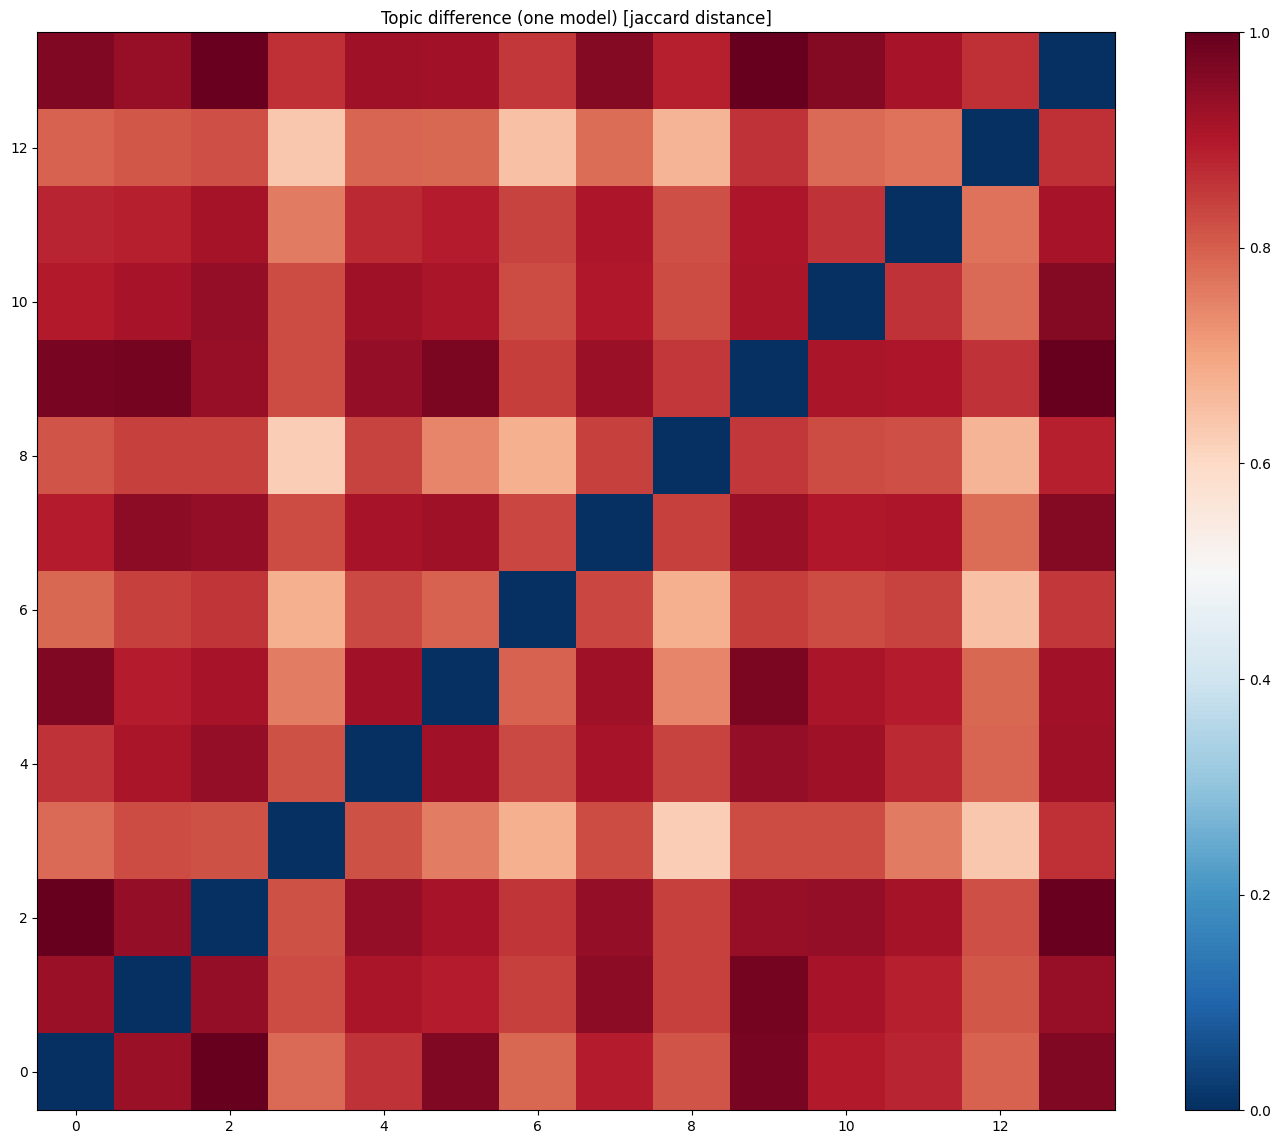

In [ ]:
from gensim.models import LdaMulticore

def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)

num_topics = 14

lda_fst = LdaMulticore(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    workers=4,
    eval_every=None,
    passes=10,
    batch=True
)

mdiff, annotation = lda_fst.diff(lda_fst, distance='jaccard', num_words=2000)
plot_difference_matplotlib(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)
